<h1> 3장 신경망 시작하기

<h3> 3.1 신경망의 구조 </h3>
- 네트워크(또는 모델)을 구성하는 층<br>
- 입력 데이터와 그에 상응하는 타깃<br>
- 학습에 사용할 피드백 신호를 정의하는 손실 함수 <br>
- 학습 진행 방식을 결정하는 옵티마이저

<h4> 3.1.1 층: 딥러닝의 구성 단위 </h4>
층 : 하나 이상의 텐서를 입력으로 받아 하나 이상의 텐서를 출력하는 데이터 처리  모듈 <br>
가중치 : 확률적 경사 하강법에 의해 학습되는 하나 이상의 텐서 ( 학습된 지식 )<br>

케라스에서는 모델에 추가된 층을 자동으로 상위 층의 크기에 맞춤


<h4> 3.1.2 모델: 층의 네트워크</h4>

모델은 층으로 만든 비순환 유향 그래프(DAG)이다. <br>
네트워크 구조는 가설공간 을 정의 <br>
가설공간 : 어떤 문제를 해결하는데 필요한 가설들의 집합 <br>
- 가능성 있는 공간을 사전에 정의하고 피드백 신호의 도움을 받아 입력 데이터에 대한 유용한 변환을 찾는 것 <br><br>

연습을 해야만 적절한 신경망을 설계할 수 있는 기술을 갖추게 됨


<h4> 3.1.3 손실 함수와 옵티마이저 : 학습 과정을 조절하는 열쇠</h4>
손실 함수와 옵티마이저를 결정해야함<br>
여러 개의 출력을 내는 신경망은 여러 개의 손실 함수를 가질 수 있으나 경사 하강법 과정은 하나의 스칼라 손실 값을 기준으로 함 <br>
- 따라서 모든 손실을 평균내어 하나의 스칼라양으로 합쳐짐<br><br>

=> 문제에 맞는 올바른 목적 함수를 선택하는 것이 아주 중요<br>
신경망은 단지 손실 함수를 최소화하기만 한다는 것

<h3> 3.2 케라스 소개 </h3>

케라스는 거의 모든 종류의 딥러닝 모델을 간편하게 만들고 훈련시킬 수 있는 파이썬을 위한 **딥러닝 프레임워크** <br>
<br>
케라스 특징<br>
1. 동일한 코드로 CPU와 GPU에서 실행할 수 있음 
2. 사용하기 쉬운 API를 가지고 있어 딥러닝 모델의 프로토타입을 빠르게 만들 수 있음
3. 합성곱 신경망, 순환 신경망을 지원하며 자유롭게 조합하여 사용 가능
4. 다중 입력이나 다중 출력 모델, 층의 공유, 모델 공유 등 어떤 네트워크 구조 만들기 가능

<H4> 3.2.1 케라스, 텐서플로, 씨아노, CNTK </H4>
케라스 : 딥러닝 모델을 만들기 위한 고수준의 구성 요소를 제공하는 모델 수준의 라이브러리 (텐서 조작 or 미분 같은 저수준 연산 안다룸) <br>
- 대신 최적화되고 특화된 텐서 라이브러리 (백엔드 엔진)<br>
- 모듈 구조로 구성되어 여러가지 백엔드 엔진이 연동됨<br>
but 대부분의 딥러닝 작업에 텐서플로 백엔드가 기본으로 권장


<h4> 3.2.2 케라스를 사용한 개발: 빠르게 둘러보기</h4>
케라스 작업 흐름 <br>
1. 훈련 데이터 정의 (test/train)
2. 네트워크(모델) 정의
3. 손실 함수. 옵티마이저, 모니터링을 위한 측정 지표 선택
4. fit<br><br>

모델 정의 <Br>
Sequential 클래스 (층을 순서대로 쌓아올림) or 함수형 API(임의의 구조)


<h3> 3.3 딥러닝 컴퓨터 셋팅 </h3>
최신 NVIDIA GPU에서 딥러닝 코드를 실행하는 것을 권장 <BR>
유닉스 (Unix) 운영체제를 사용하는 것이 좋음 (윈도 비추)<Br>
GPU 웬만해서는 있는 것이 더 좋음 (NVIDIA 것으로)<BR>


----
<H3> 3.4 영화 리뷰 분류 : 이진 분류 예제 </H3>

리뷰 텍스트르르 기반으로 영화 리뷰를 긍정과 부정으로 분류하는 방법<BR><bR>

IMDB 데이터셋 (인터넷 영화 데이터베이스) <BR>
- 5만 개 (TEST : 25000, Train : 25000, 50% 긍정 50% 부정)

In [ ]:
# 데이터 셋 로드
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# num_word 는 훈련 데이터에서 가장 자주 나타나는 단어 1만 개만 사용하겠다는 의미


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
#word_index 는 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()
# 정수 인덱스와 단어를 매핑하도록 뒤집기
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
# 정수 시퀸스를 이진 행렬로 인코딩
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  # 크기 (len(sequences), dimension)이고 모든 원소가 0인 행렬을 만듬
  results = np.zeros((len(sequences), dimension)) 
  for i, sequence in enumerate(sequences):
    # results[i] 에서 특정 인덱스의 위치를 1로 변환
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
print(train_data[0])
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[0. 1. 1. ... 0. 0. 0.]


In [ ]:
x_train[0].type()


AttributeError: ignored

In [ ]:
# 레이블도 변환 
#y_train = np.asarray(train_labels).astype('float32')
#y_test = np.asarray(test_labels).astype('float32')

y_train = np.astype('float32')
y_test = np.astype('float32')

AttributeError: ignored

In [ ]:
# 모델 정의
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# 모델 컴파일
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 검증 세트 준비
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
#모델 훈련
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size =512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 30ms/step - loss: 0.6040 - accuracy: 0.6959 - val_loss: 0.3943 - val_accuracy: 0.8707
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3302 - accuracy: 0.8985 - val_loss: 0.3039 - val_accuracy: 0.8895
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2362 - accuracy: 0.9230 - val_loss: 0.2783 - val_accuracy: 0.8921
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1781 - accuracy: 0.9435 - val_loss: 0.2814 - val_accuracy: 0.8857
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1459 - accuracy: 0.9532 - val_loss: 0.2797 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1178 - accuracy: 0.9657 - val_loss: 0.2922 - val_accuracy: 0.8884
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0968 - accuracy: 0.9713 - val_loss: 0.3288 - val_accuracy: 0.8773
Epoch 8/20
30

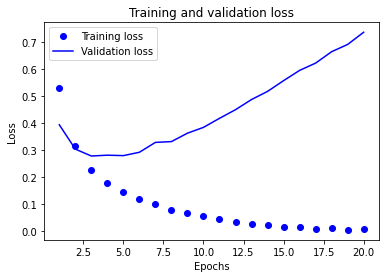

In [ ]:
# 훈련과 검증 손실 그리기 
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label ='Training loss') # bo = 파란색 점
plt.plot(epochs, val_loss, 'b', label = 'Validation loss') # b = 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

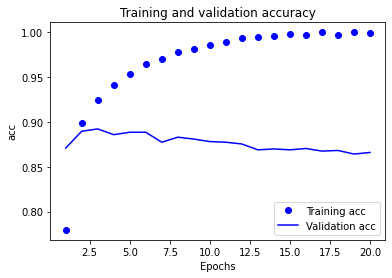

In [ ]:
# 훈련과 검증 정확도 그리기
plt.clf() # 그래프 초기화 

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label ='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

In [ ]:
# 모델 처음부터 다시 훈련
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.5358 - accuracy: 0.7480
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2590 - accuracy: 0.9139
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1882 - accuracy: 0.9361
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2958 - accuracy: 0.8834


In [ ]:
# 추가 실험
# 1개 은닉층 
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.5385 - accuracy: 0.7437
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2922 - accuracy: 0.9031
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2220 - accuracy: 0.9275
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2826 - accuracy: 0.8859


In [ ]:
#3 개 은닉층
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.5901 - accuracy: 0.6916
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.3046 - accuracy: 0.9074
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2105 - accuracy: 0.9308
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3079 - accuracy: 0.8811


In [ ]:
# 은닉 유닉 추가 
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.5326 - accuracy: 0.7412
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2460 - accuracy: 0.9110
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1870 - accuracy: 0.9311
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3187 - accuracy: 0.8776


In [ ]:
# 손실함수 변경
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1847 - accuracy: 0.7354
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.0778 - accuracy: 0.9150
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.0571 - accuracy: 0.9350
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0908 - accuracy: 0.8766


In [ ]:
# 활성화 함수 변경
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.5449 - accuracy: 0.7561
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2689 - accuracy: 0.9126
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1856 - accuracy: 0.9381
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3233 - accuracy: 0.8772


-----
<h3> 뉴스 기사 분류 : 다중 분류 문제 </h3>

단일 레이블 다중 분류 : 각 데이터 포인트가 정확히 하나의 범주로 분류 (중복 x) <br>
다중 레이블 다중 분류 : 각 데이터 포인트가 여러 개의 범주에 속함 (중복 o)<br><Br>

**로이터 데이터 셋<br>**
뉴스 기사와 토픽의 집합 <br>
46개의 토픽, 각 토픽은 훈련 세트에 최소한 10개의 샘플

In [ ]:
# 데이터셋 로드
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
# 8982개 train / 2246개 test (20% 기본값)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
# 정수 시퀸스를 이진 행렬로 인코딩
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  # 크기 (len(sequences), dimension)이고 모든 원소가 0인 행렬을 만듬
  results = np.zeros((len(sequences), dimension)) 
  for i, sequence in enumerate(sequences):
    # results[i] 에서 특정 인덱스의 위치를 1로 변환
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# 레이블 원-핫 인코딩
def to_one_hot(labels, dimension=46):
  results= np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i,label] =1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
# to_categorical 내장 함수가 존재함

In [ ]:
# 모델 정의
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
# 모델 컴파일
model.compile(optimizer ='rmsprop',
              loss='categorical_crossentropy',
              metrics =['accuracy'])

In [ ]:
# 검증 세트 준비
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
# 모델 훈련
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size =512,
                    validation_data = (x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 24ms/step - loss: 3.1029 - accuracy: 0.4111 - val_loss: 1.7484 - val_accuracy: 0.6310
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.5291 - accuracy: 0.6810 - val_loss: 1.3026 - val_accuracy: 0.7160
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0547 - accuracy: 0.7775 - val_loss: 1.1364 - val_accuracy: 0.7630
Epoch 4/20
16/16 [==============================] - 0s 28ms/step - loss: 0.8362 - accuracy: 0.8255 - val_loss: 1.0233 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6753 - accuracy: 0.8648 - val_loss: 0.9616 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5146 - accuracy: 0.8979 - val_loss: 0.9099 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4355 - accuracy: 0.9124 - val_loss: 0.8959 - val_accuracy: 0.8170
Epoch 8/20
16

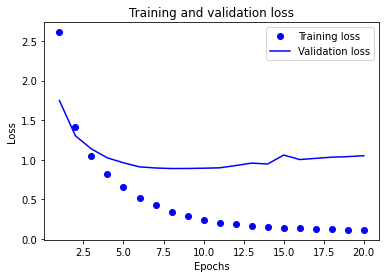

In [ ]:
# 훈련과 검증 손실 그리기 
import matplotlib.pyplot as plt

plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label ='Training loss') # bo = 파란색 점
plt.plot(epochs, val_loss, 'b', label = 'Validation loss') # b = 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

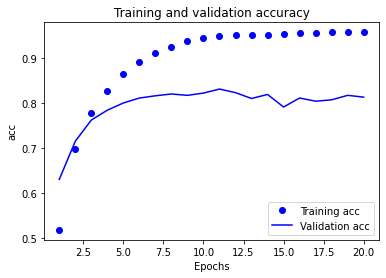

In [ ]:
# 훈련과 검증 정확도 그리기
plt.clf() # 그래프 초기화 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label ='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

In [ ]:
# 모델 처음부터 다시 훈련

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# 모델 컴파일
model.compile(optimizer ='rmsprop',
              loss='categorical_crossentropy',
              metrics =['accuracy'])

# 모델 훈련
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 9,
                    batch_size =512,
                    validation_data = (x_val,y_val))

Epoch 1/9
16/16 [==============================] - 1s 24ms/step - loss: 3.1581 - accuracy: 0.2689 - val_loss: 1.8633 - val_accuracy: 0.6400
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.6170 - accuracy: 0.6839 - val_loss: 1.3608 - val_accuracy: 0.7160
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 1.1223 - accuracy: 0.7589 - val_loss: 1.1748 - val_accuracy: 0.7300
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 0.8709 - accuracy: 0.8112 - val_loss: 1.0700 - val_accuracy: 0.7760
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.7017 - accuracy: 0.8509 - val_loss: 0.9854 - val_accuracy: 0.7960
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 0.5607 - accuracy: 0.8784 - val_loss: 0.9385 - val_accuracy: 0.8010
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.4300 - accuracy: 0.9137 - val_loss: 0.9006 - val_accuracy: 0.8150
Epoch 8/9
16/16 [===

In [ ]:
# 최종 결과 
results

[0.32331570982933044, 0.877240002155304]

In [ ]:
# 새로운 데이터에 대해 예측
predictions = model.predict(x_test)
np.argmax(predictions[0])

3

In [ ]:
# 병목있는 모델
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# 모델 컴파일
model.compile(optimizer ='rmsprop',
              loss='categorical_crossentropy',
              metrics =['accuracy'])

# 모델 훈련
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 9,
                    batch_size =512,
                    validation_data = (x_val,y_val))

Epoch 1/9
16/16 [==============================] - 1s 24ms/step - loss: 3.4244 - accuracy: 0.1478 - val_loss: 2.7442 - val_accuracy: 0.2490
Epoch 2/9
16/16 [==============================] - 0s 26ms/step - loss: 2.5244 - accuracy: 0.2589 - val_loss: 2.2660 - val_accuracy: 0.2850
Epoch 3/9
16/16 [==============================] - 0s 14ms/step - loss: 2.0746 - accuracy: 0.3973 - val_loss: 1.9556 - val_accuracy: 0.5850
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 1.7687 - accuracy: 0.5909 - val_loss: 1.7512 - val_accuracy: 0.6000
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 1.5244 - accuracy: 0.6445 - val_loss: 1.6343 - val_accuracy: 0.6300
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 1.3711 - accuracy: 0.6711 - val_loss: 1.5313 - val_accuracy: 0.6580
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 1.2440 - accuracy: 0.6975 - val_loss: 1.4879 - val_accuracy: 0.6710
Epoch 8/9
16/16 [===

In [ ]:
# 추가 실험 
# 32개 층
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# 모델 컴파일
model.compile(optimizer ='rmsprop',
              loss='categorical_crossentropy',
              metrics =['accuracy'])

# 모델 훈련
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 9,
                    batch_size =512,
                    validation_data = (x_val,y_val))

Epoch 1/9
16/16 [==============================] - 1s 24ms/step - loss: 3.4828 - accuracy: 0.3141 - val_loss: 2.4536 - val_accuracy: 0.6100
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 2.1885 - accuracy: 0.6393 - val_loss: 1.7365 - val_accuracy: 0.6560
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 1.5581 - accuracy: 0.7052 - val_loss: 1.4248 - val_accuracy: 0.7110
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 1.2176 - accuracy: 0.7495 - val_loss: 1.2568 - val_accuracy: 0.7210
Epoch 5/9
16/16 [==============================] - 0s 14ms/step - loss: 1.0409 - accuracy: 0.7683 - val_loss: 1.1623 - val_accuracy: 0.7370
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 0.9013 - accuracy: 0.7973 - val_loss: 1.0863 - val_accuracy: 0.7570
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.7622 - accuracy: 0.8288 - val_loss: 1.0380 - val_accuracy: 0.7620
Epoch 8/9
16/16 [===

In [ ]:
# 128개 층
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# 모델 컴파일
model.compile(optimizer ='rmsprop',
              loss='categorical_crossentropy',
              metrics =['accuracy'])

# 모델 훈련
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 9,
                    batch_size =512,
                    validation_data = (x_val,y_val))

Epoch 1/9
16/16 [==============================] - 1s 23ms/step - loss: 2.8843 - accuracy: 0.4260 - val_loss: 1.4028 - val_accuracy: 0.6730
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.1763 - accuracy: 0.7415 - val_loss: 1.1428 - val_accuracy: 0.7510
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 0.7912 - accuracy: 0.8270 - val_loss: 0.9638 - val_accuracy: 0.7980
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 0.5590 - accuracy: 0.8901 - val_loss: 1.0061 - val_accuracy: 0.7670
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.4313 - accuracy: 0.9119 - val_loss: 0.8483 - val_accuracy: 0.8170
Epoch 6/9
16/16 [==============================] - 0s 14ms/step - loss: 0.3170 - accuracy: 0.9335 - val_loss: 0.8893 - val_accuracy: 0.8120
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.2587 - accuracy: 0.9422 - val_loss: 0.8995 - val_accuracy: 0.8000
Epoch 8/9
16/16 [===

In [ ]:
# 3개 은닉층 
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# 모델 컴파일
model.compile(optimizer ='rmsprop',
              loss='categorical_crossentropy',
              metrics =['accuracy'])

# 모델 훈련
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 9,
                    batch_size =512,
                    validation_data = (x_val,y_val))

Epoch 1/9
16/16 [==============================] - 1s 24ms/step - loss: 3.1009 - accuracy: 0.4153 - val_loss: 1.6206 - val_accuracy: 0.6540
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.4585 - accuracy: 0.6834 - val_loss: 1.2799 - val_accuracy: 0.7040
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 1.0567 - accuracy: 0.7698 - val_loss: 1.1747 - val_accuracy: 0.7370
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.8493 - accuracy: 0.8131 - val_loss: 1.0404 - val_accuracy: 0.7740
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.6614 - accuracy: 0.8530 - val_loss: 1.0176 - val_accuracy: 0.7820
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 0.5278 - accuracy: 0.8856 - val_loss: 0.9636 - val_accuracy: 0.8080
Epoch 7/9
16/16 [==============================] - 0s 27ms/step - loss: 0.3834 - accuracy: 0.9191 - val_loss: 0.9525 - val_accuracy: 0.8110
Epoch 8/9
16/16 [===

----
<h3> 3.6 주택 가격 예측 : 회귀 문제</h3>

보스턴 주택 가격 데이터 셋 <br>
506개 데이터 (train 404 / test 102)<br>
각 특성의 스케일이 서로 다름

In [ ]:
# 데이터셋 로드
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [ ]:
# 데이터 정규화
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [ ]:
# 모델 정의
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [ ]:
# k 겹 검증
import numpy as np

k=4
num_val_samples =len(train_data) // k # 몫
num_epochs =100
all_scores =[]
for i in range(k):
  print('처리중인 폴드 # ', i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1)* num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i+1)* num_val_samples:]],
       axis=0
  )
  
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i+1)* num_val_samples:]],
       axis=0
  )

  model = build_model() 
  model.fit(partial_train_data , partial_train_targets, epochs=num_epochs, batch_size=1 , verbose=0)
  val_mse, val_mae = model.evaluate(val_data,val_targets, verbose=0)
  all_scores.append(val_mae)

처리중인 폴드 #  0
처리중인 폴드 #  1
처리중인 폴드 #  2
처리중인 폴드 #  3


In [ ]:
num_epochs =500
all_scores =[]
for i in range(k):
  print('처리중인 폴드 # ', i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1)* num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i+1)* num_val_samples:]],
       axis=0
  )
  
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i+1)* num_val_samples:]],
       axis=0
  )

  model = build_model() 
  history=model.fit(partial_train_data , partial_train_targets, epochs=num_epochs, batch_size=1 , verbose=0)
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

처리중인 폴드 #  0


KeyError: ignored

In [ ]:
# 검증 평균 점수 기록
average_mae_history = [ np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
plt.plot(range(1,len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# 처음 10개 제외하고 다시 그리기
def smooth_curve(points, factor =0.9):
  smoothed_points =[]
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point *(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1,len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()
